[View in Colaboratory](https://colab.research.google.com/github/tgi25/home/blob/master/AutoEncoder_01.ipynb)

### Loading the MNIST dataset

In [2]:
from keras.datasets import mnist #importing the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print "x_train shape = ", x_train.shape, "y_train shape = ", y_train.shape
print "x_test shape = ", x_test.shape, "y_test shape = ", y_test.shape

11501568/11490434 [==============================] - 1s 0us/step
x_train shape =  (60000, 28, 28) y_train shape =  (60000,)
x_test shape =  (10000, 28, 28) y_test shape =  (10000,)


### Casting inputs to float32

In [0]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

### Reshaping inputs

In [4]:
INPUT_DIM = 784 #28 by 28

x_train_reshape = x_train.reshape(60000, INPUT_DIM)
x_test_reshape = x_test.reshape(10000, INPUT_DIM)
print x_train.shape, "=>", x_train_reshape.shape
print x_test.shape,  "=>", x_test_reshape.shape

(60000, 28, 28) => (60000, 784)
(10000, 28, 28) => (10000, 784)


### Normalizing the inputs

In [0]:
x_train_reshape /= 255
x_test_reshape  /= 255

### Building the Autoencoder model

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation

ENCODING_DIM = 32
autoencoder = Sequential()
autoencoder.add(Dense(ENCODING_DIM, activation='relu', input_shape=(INPUT_DIM,)))
autoencoder.add(Dense(INPUT_DIM, activation='sigmoid'))
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

### Fitting the Autoencoder

In [8]:
autoencoder_history = autoencoder.fit(x=x_train_reshape, y=x_train_reshape,
                                     epochs=100, batch_size=256,
                                     shuffle=True,
                                     validation_data=(x_test_reshape, x_test_reshape),
                                     verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.3626 - acc: 0.7490 - val_loss: 0.2710 - val_acc: 0.7945
Epoch 2/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.2632 - acc: 0.7969 - val_loss: 0.2522 - val_acc: 0.7954
Epoch 3/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.2423 - acc: 0.7963 - val_loss: 0.2306 - val_acc: 0.7960
Epoch 4/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.2231 - acc: 0.7966 - val_loss: 0.2136 - val_acc: 0.7967
Epoch 5/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.2085 - acc: 0.7977 - val_loss: 0.2011 - val_acc: 0.7983
Epoch 6/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1974 - acc: 0.7991 - val_loss: 0.1915 - val_acc: 0.7994
Epoch 7/100
11776/60000 [====>.........................] - ETA: 1s - loss: 0.1920 - acc: 0.7999

60000/60000 [==============================] - 2s 29us/step - loss: 0.1889 - acc: 0.8003 - val_loss: 0.1840 - val_acc: 0.8007
Epoch 8/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1822 - acc: 0.8014 - val_loss: 0.1779 - val_acc: 0.8013
Epoch 9/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1767 - acc: 0.8023 - val_loss: 0.1729 - val_acc: 0.8023
Epoch 10/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1720 - acc: 0.8032 - val_loss: 0.1686 - val_acc: 0.8032
Epoch 11/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1679 - acc: 0.8039 - val_loss: 0.1647 - val_acc: 0.8040
Epoch 12/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1642 - acc: 0.8045 - val_loss: 0.1610 - val_acc: 0.8044
Epoch 13/100
38400/60000 [==================>...........] - ETA: 0s - loss: 0.1614 - acc: 0.8046

60000/60000 [==============================] - 2s 29us/step - loss: 0.1607 - acc: 0.8051 - val_loss: 0.1577 - val_acc: 0.8050
Epoch 14/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1574 - acc: 0.8057 - val_loss: 0.1544 - val_acc: 0.8055
Epoch 15/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1543 - acc: 0.8063 - val_loss: 0.1512 - val_acc: 0.8062
Epoch 16/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1512 - acc: 0.8069 - val_loss: 0.1481 - val_acc: 0.8067
Epoch 17/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1481 - acc: 0.8074 - val_loss: 0.1451 - val_acc: 0.8071
Epoch 18/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1453 - acc: 0.8079 - val_loss: 0.1423 - val_acc: 0.8076
Epoch 19/100
42752/60000 [====================>.........] - ETA: 0s - loss: 0.1427 - acc: 0.8084

60000/60000 [==============================] - 2s 28us/step - loss: 0.1425 - acc: 0.8084 - val_loss: 0.1396 - val_acc: 0.8080
Epoch 20/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1400 - acc: 0.8088 - val_loss: 0.1372 - val_acc: 0.8084
Epoch 21/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1376 - acc: 0.8092 - val_loss: 0.1349 - val_acc: 0.8088
Epoch 22/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1354 - acc: 0.8095 - val_loss: 0.1327 - val_acc: 0.8090
Epoch 23/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1333 - acc: 0.8099 - val_loss: 0.1307 - val_acc: 0.8093
Epoch 24/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1313 - acc: 0.8102 - val_loss: 0.1287 - val_acc: 0.8095
Epoch 25/100
41984/60000 [===================>..........] - ETA: 0s - loss: 0.1298 - acc: 0.8103

60000/60000 [==============================] - 2s 28us/step - loss: 0.1294 - acc: 0.8104 - val_loss: 0.1270 - val_acc: 0.8098
Epoch 26/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1277 - acc: 0.8107 - val_loss: 0.1252 - val_acc: 0.8100
Epoch 27/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1260 - acc: 0.8109 - val_loss: 0.1236 - val_acc: 0.8103
Epoch 28/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1245 - acc: 0.8111 - val_loss: 0.1221 - val_acc: 0.8104
Epoch 29/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1230 - acc: 0.8113 - val_loss: 0.1207 - val_acc: 0.8107
Epoch 30/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1216 - acc: 0.8115 - val_loss: 0.1193 - val_acc: 0.8108
Epoch 31/100
42496/60000 [====================>.........] - ETA: 0s - loss: 0.1204 - acc: 0.8118

60000/60000 [==============================] - 2s 28us/step - loss: 0.1203 - acc: 0.8117 - val_loss: 0.1180 - val_acc: 0.8108
Epoch 32/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1190 - acc: 0.8118 - val_loss: 0.1169 - val_acc: 0.8111
Epoch 33/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1179 - acc: 0.8120 - val_loss: 0.1157 - val_acc: 0.8112
Epoch 34/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1168 - acc: 0.8121 - val_loss: 0.1147 - val_acc: 0.8113
Epoch 35/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1159 - acc: 0.8122 - val_loss: 0.1137 - val_acc: 0.8114
Epoch 36/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1149 - acc: 0.8123 - val_loss: 0.1129 - val_acc: 0.8115
Epoch 37/100
35840/60000 [================>.............] - ETA: 0s - loss: 0.1143 - acc: 0.8122

60000/60000 [==============================] - 2s 29us/step - loss: 0.1141 - acc: 0.8124 - val_loss: 0.1121 - val_acc: 0.8117
Epoch 38/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1133 - acc: 0.8125 - val_loss: 0.1112 - val_acc: 0.8117
Epoch 39/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1125 - acc: 0.8126 - val_loss: 0.1105 - val_acc: 0.8118
Epoch 40/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1118 - acc: 0.8126 - val_loss: 0.1098 - val_acc: 0.8119
Epoch 41/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1111 - acc: 0.8127 - val_loss: 0.1092 - val_acc: 0.8119
Epoch 42/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1105 - acc: 0.8128 - val_loss: 0.1086 - val_acc: 0.8119
Epoch 43/100
43008/60000 [====================>.........] - ETA: 0s - loss: 0.1100 - acc: 0.8129

60000/60000 [==============================] - 2s 28us/step - loss: 0.1099 - acc: 0.8128 - val_loss: 0.1080 - val_acc: 0.8120
Epoch 44/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1094 - acc: 0.8129 - val_loss: 0.1075 - val_acc: 0.8120
Epoch 45/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1089 - acc: 0.8129 - val_loss: 0.1070 - val_acc: 0.8122
Epoch 46/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1084 - acc: 0.8130 - val_loss: 0.1065 - val_acc: 0.8122
Epoch 47/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1079 - acc: 0.8130 - val_loss: 0.1061 - val_acc: 0.8122
Epoch 48/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1075 - acc: 0.8131 - val_loss: 0.1057 - val_acc: 0.8122
Epoch 49/100
40448/60000 [===================>..........] - ETA: 0s - loss: 0.1071 - acc: 0.8129

60000/60000 [==============================] - 2s 29us/step - loss: 0.1071 - acc: 0.8131 - val_loss: 0.1053 - val_acc: 0.8122
Epoch 50/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1067 - acc: 0.8131 - val_loss: 0.1049 - val_acc: 0.8123
Epoch 51/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1064 - acc: 0.8132 - val_loss: 0.1046 - val_acc: 0.8123
Epoch 52/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1060 - acc: 0.8132 - val_loss: 0.1043 - val_acc: 0.8123
Epoch 53/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1057 - acc: 0.8132 - val_loss: 0.1040 - val_acc: 0.8124
Epoch 54/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1054 - acc: 0.8133 - val_loss: 0.1037 - val_acc: 0.8124
Epoch 55/100
42496/60000 [====================>.........] - ETA: 0s - loss: 0.1051 - acc: 0.8132

60000/60000 [==============================] - 2s 28us/step - loss: 0.1051 - acc: 0.8133 - val_loss: 0.1034 - val_acc: 0.8124
Epoch 56/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1048 - acc: 0.8133 - val_loss: 0.1031 - val_acc: 0.8124
Epoch 57/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1046 - acc: 0.8133 - val_loss: 0.1029 - val_acc: 0.8125
Epoch 58/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1043 - acc: 0.8133 - val_loss: 0.1026 - val_acc: 0.8125
Epoch 59/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1041 - acc: 0.8134 - val_loss: 0.1024 - val_acc: 0.8124
Epoch 60/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1039 - acc: 0.8134 - val_loss: 0.1021 - val_acc: 0.8125
Epoch 61/100
40704/60000 [===================>..........] - ETA: 0s - loss: 0.1037 - acc: 0.8132

60000/60000 [==============================] - 2s 29us/step - loss: 0.1036 - acc: 0.8134 - val_loss: 0.1019 - val_acc: 0.8125
Epoch 62/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1034 - acc: 0.8134 - val_loss: 0.1017 - val_acc: 0.8126
Epoch 63/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1032 - acc: 0.8134 - val_loss: 0.1015 - val_acc: 0.8126
Epoch 64/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1030 - acc: 0.8135 - val_loss: 0.1013 - val_acc: 0.8126
Epoch 65/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1028 - acc: 0.8135 - val_loss: 0.1011 - val_acc: 0.8126
Epoch 66/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1027 - acc: 0.8135 - val_loss: 0.1010 - val_acc: 0.8126
Epoch 67/100
40704/60000 [===================>..........] - ETA: 0s - loss: 0.1024 - acc: 0.8136

60000/60000 [==============================] - 2s 28us/step - loss: 0.1025 - acc: 0.8135 - val_loss: 0.1008 - val_acc: 0.8126
Epoch 68/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1023 - acc: 0.8135 - val_loss: 0.1007 - val_acc: 0.8127
Epoch 69/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1022 - acc: 0.8135 - val_loss: 0.1005 - val_acc: 0.8126
Epoch 70/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1020 - acc: 0.8135 - val_loss: 0.1004 - val_acc: 0.8126
Epoch 71/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1019 - acc: 0.8135 - val_loss: 0.1003 - val_acc: 0.8127
Epoch 72/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1018 - acc: 0.8136 - val_loss: 0.1001 - val_acc: 0.8127
Epoch 73/100
38400/60000 [==================>...........] - ETA: 0s - loss: 0.1016 - acc: 0.8140

60000/60000 [==============================] - 2s 28us/step - loss: 0.1016 - acc: 0.8136 - val_loss: 0.1000 - val_acc: 0.8127
Epoch 74/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1015 - acc: 0.8136 - val_loss: 0.0999 - val_acc: 0.8127
Epoch 75/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1014 - acc: 0.8136 - val_loss: 0.0998 - val_acc: 0.8127
Epoch 76/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1013 - acc: 0.8136 - val_loss: 0.0997 - val_acc: 0.8127
Epoch 77/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1012 - acc: 0.8136 - val_loss: 0.0996 - val_acc: 0.8127
Epoch 78/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1011 - acc: 0.8136 - val_loss: 0.0995 - val_acc: 0.8127
Epoch 79/100
42240/60000 [====================>.........] - ETA: 0s - loss: 0.1009 - acc: 0.8136

60000/60000 [==============================] - 2s 28us/step - loss: 0.1010 - acc: 0.8136 - val_loss: 0.0994 - val_acc: 0.8128
Epoch 80/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1009 - acc: 0.8136 - val_loss: 0.0993 - val_acc: 0.8128
Epoch 81/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1008 - acc: 0.8136 - val_loss: 0.0992 - val_acc: 0.8127
Epoch 82/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1008 - acc: 0.8136 - val_loss: 0.0991 - val_acc: 0.8127
Epoch 83/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1007 - acc: 0.8136 - val_loss: 0.0991 - val_acc: 0.8127
Epoch 84/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1006 - acc: 0.8137 - val_loss: 0.0990 - val_acc: 0.8128
Epoch 85/100
38400/60000 [==================>...........] - ETA: 0s - loss: 0.1004 - acc: 0.8140

60000/60000 [==============================] - 2s 28us/step - loss: 0.1005 - acc: 0.8137 - val_loss: 0.0989 - val_acc: 0.8128
Epoch 86/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1005 - acc: 0.8137 - val_loss: 0.0989 - val_acc: 0.8127
Epoch 87/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1004 - acc: 0.8137 - val_loss: 0.0988 - val_acc: 0.8127
Epoch 88/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1003 - acc: 0.8137 - val_loss: 0.0987 - val_acc: 0.8128
Epoch 89/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1003 - acc: 0.8137 - val_loss: 0.0987 - val_acc: 0.8128
Epoch 90/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1002 - acc: 0.8137 - val_loss: 0.0986 - val_acc: 0.8128
Epoch 91/100
41728/60000 [===================>..........] - ETA: 0s - loss: 0.1003 - acc: 0.8135

60000/60000 [==============================] - 2s 29us/step - loss: 0.1002 - acc: 0.8137 - val_loss: 0.0986 - val_acc: 0.8128
Epoch 92/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1001 - acc: 0.8137 - val_loss: 0.0985 - val_acc: 0.8128
Epoch 93/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1001 - acc: 0.8137 - val_loss: 0.0985 - val_acc: 0.8128
Epoch 94/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1000 - acc: 0.8137 - val_loss: 0.0984 - val_acc: 0.8128
Epoch 95/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1000 - acc: 0.8137 - val_loss: 0.0984 - val_acc: 0.8128
Epoch 96/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0999 - acc: 0.8137 - val_loss: 0.0983 - val_acc: 0.8128
Epoch 97/100
40192/60000 [===================>..........] - ETA: 0s - loss: 0.0998 - acc: 0.8137

60000/60000 [==============================] - 2s 28us/step - loss: 0.0999 - acc: 0.8137 - val_loss: 0.0983 - val_acc: 0.8128
Epoch 98/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0998 - acc: 0.8137 - val_loss: 0.0982 - val_acc: 0.8128
Epoch 99/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0998 - acc: 0.8137 - val_loss: 0.0982 - val_acc: 0.8128
Epoch 100/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0997 - acc: 0.8137 - val_loss: 0.0981 - val_acc: 0.8128


### Plotting the model performances

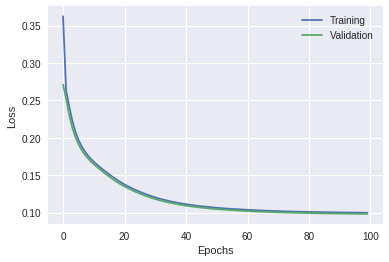

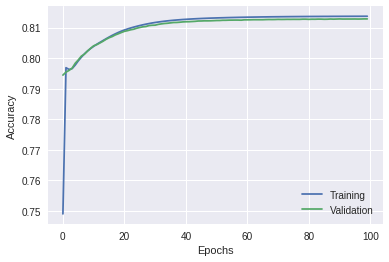

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(autoencoder_history)# use Matplotlib (don't ask)

### Reconstructing the test images

In [10]:
reconstructed_imgs = autoencoder.predict(x_test_reshape)
print "Shape of reconstructed images = ", reconstructed_imgs.shape

Shape of reconstructed images =  (10000, 784)


### Plotting the first 10 original and reconstructed images

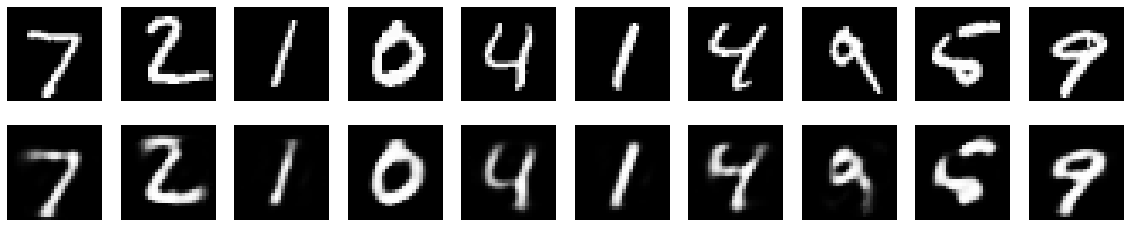

In [11]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



---



### **Loading the FASHION_MNIST dataset** (Different from the MNIST dataset, but they are of same size (28*28))

In [14]:
from keras.datasets import fashion_mnist
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()
print x_train_fashion.shape
print y_train_fashion.shape

(60000, 28, 28)
(60000,)


### **Casting inputs to float32** **bold text**

In [0]:
x_train_fashion = x_train_fashion.astype('float32')
x_test_fashion  = x_test_fashion.astype('float32')

### **Reshaping inputs**

In [18]:
INPUT_DIM = 784 #28 by 28

x_train_fashion_reshape = x_train_fashion.reshape(60000, INPUT_DIM)
x_test_fashion_reshape = x_test_fashion.reshape(10000, INPUT_DIM)
print x_train_fashion.shape, "=>", x_train_fashion_reshape.shape
print x_test_fashion.shape,  "=>", x_test_fashion_reshape.shape

(60000, 28, 28) => (60000, 784)
(10000, 28, 28) => (10000, 784)


### **Normalizing the inputs**

In [0]:
x_train_fashion_reshape /= 255
x_test_fashion_reshape  /= 255

### **Reconstructing Test Dataset of the FASHION_MNIST**

In [20]:
reconstructed_fashion_imgs = autoencoder.predict(x_test_fashion_reshape)
print "Shape of reconstructed images = ", reconstructed_fashion_imgs.shape

Shape of reconstructed images =  (10000, 784)


### Plotting the first 10 original and reconstructed images

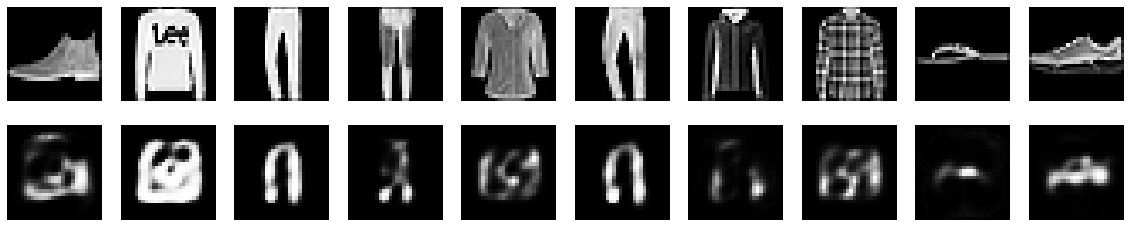

In [27]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_fashion[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_fashion_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)    
plt.show()